## Workflow for scATAC-Seq data

In [1]:
%load_ext autotime
%config InlineBackend.figure_format = 'retina'

import scarf
scarf.__version__

'0.6.3'

time: 727 ms


In [2]:
scarf.fetch_dataset('tenx_10k_pbmc_atacseq', save_path='scarf_data')
reader = scarf.CrH5Reader('scarf_data/tenx_10k_pbmc_atacseq/data.h5', 'atac')
reader.assayFeats

INFO: Download started...
INFO: Download finished! File saved here: ./tenx_10k_pbmc_atacseq/data.h5


,ATAC
type,Peaks
start,0
end,90686
nFeatures,90686


time: 1.46 s


In [3]:
writer = scarf.CrToZarr(reader, zarr_fn=f'scarf_data/tenx_10k_pbmc_atacseq/data.zarr', chunk_size=(1000, 2000))
writer.dump(batch_size=1000)

100%|██████████| 20/20 [00:12<00:00,  1.57it/s]

time: 13 s


In [4]:
ds = scarf.DataStore('tenx_10k_pbmc_atacseq/data.zarr', nthreads=4)

INFO: Setting assay ATAC to assay type: ATACassay
INFO: (ATAC) Computing nCells and dropOuts
[########################################] | 100% Completed |  8.6s
INFO: (ATAC) Computing nCounts
[########################################] | 100% Completed |  8.3s
INFO: (ATAC) Computing nFeatures
[########################################] | 100% Completed |  8.6s
time: 25.8 s


INFO: 296 cells flagged for filtering out using attribute ATAC_nCounts
INFO: 260 cells flagged for filtering out using attribute ATAC_nFeatures


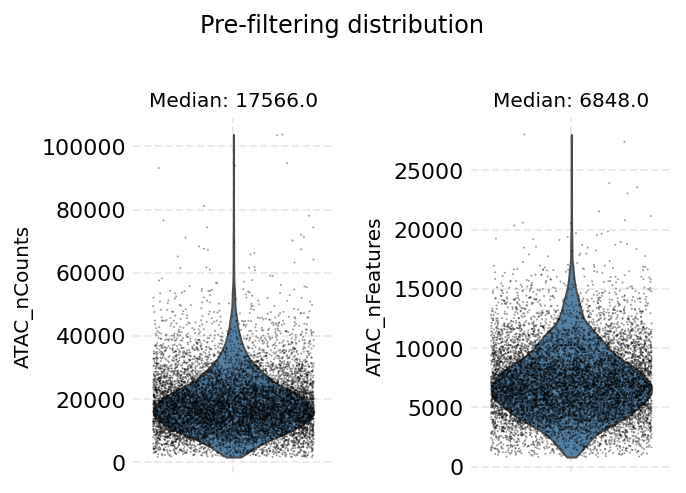

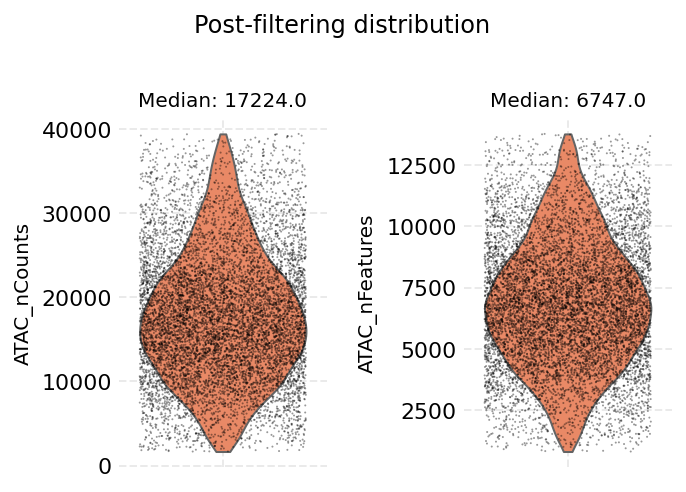

time: 1.27 s


In [5]:
ds.auto_filter_cells()

In [6]:
ds.mark_prevalent_peaks(top_n=20000)

INFO: (ATAC) Calculating peak prevalence across cells
[########################################] | 100% Completed | 14.3s
time: 14.7 s


In [7]:
ds.make_graph(feat_key='prevalent_peaks', k=11, dims=21, n_centroids=1000)

INFO: No value provided for parameter `log_transform`. Will use default value: True
INFO: No value provided for parameter `renormalize_subset`. Will use default value: True
INFO: No value provided for parameter `pca_cell_key`. Will use default value: I
INFO: Using LSI for dimension reduction
INFO: No value provided for parameter `ann_metric`. Will use default value: l2
INFO: No value provided for parameter `ann_efc`. Will use default value: min(100, max(k * 3, 50))
INFO: No value provided for parameter `ann_ef`. Will use default value: min(100, max(k * 3, 50))
INFO: No value provided for parameter `ann_m`. Will use default value: 48
INFO: No value provided for parameter `rand_state`. Will use default value: 4466
INFO: No value provided for parameter `local_connectivity`. Will use default value: 1.0
INFO: No value provided for parameter `bandwidth`. Will use default value: 1.5


Writing data to normed__I__prevalent_peaks/data: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]

INFO: Cluster number reduced to batch size of 500



Estimating seed partitions: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]

INFO: Saving loadings to ATAC/normed__I__prevalent_peaks/reduction__lsi__21__I
INFO: Saving ANN index to ATAC/normed__I__prevalent_peaks/reduction__lsi__21__I/ann__l2__50__50__48__4466
INFO: Saving kmeans clusters to ATAC/normed__I__prevalent_peaks/reduction__lsi__21__I/kmeans__1000__4466



Saving KNN graph: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]

INFO: ANN recall: 99.90%



Smoothening KNN distances: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

time: 1min 40s


In [8]:
ds.run_umap(fit_n_epochs=250, min_dist=0.5, parallel=True)

	completed  0  /  250 epochs
	completed  25  /  250 epochs
	completed  50  /  250 epochs
	completed  75  /  250 epochs
	completed  100  /  250 epochs
	completed  125  /  250 epochs
	completed  150  /  250 epochs
	completed  175  /  250 epochs
	completed  200  /  250 epochs
	completed  225  /  250 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
time: 14.1 s


In [9]:
ds.run_leiden_clustering(resolution=1)

time: 186 ms


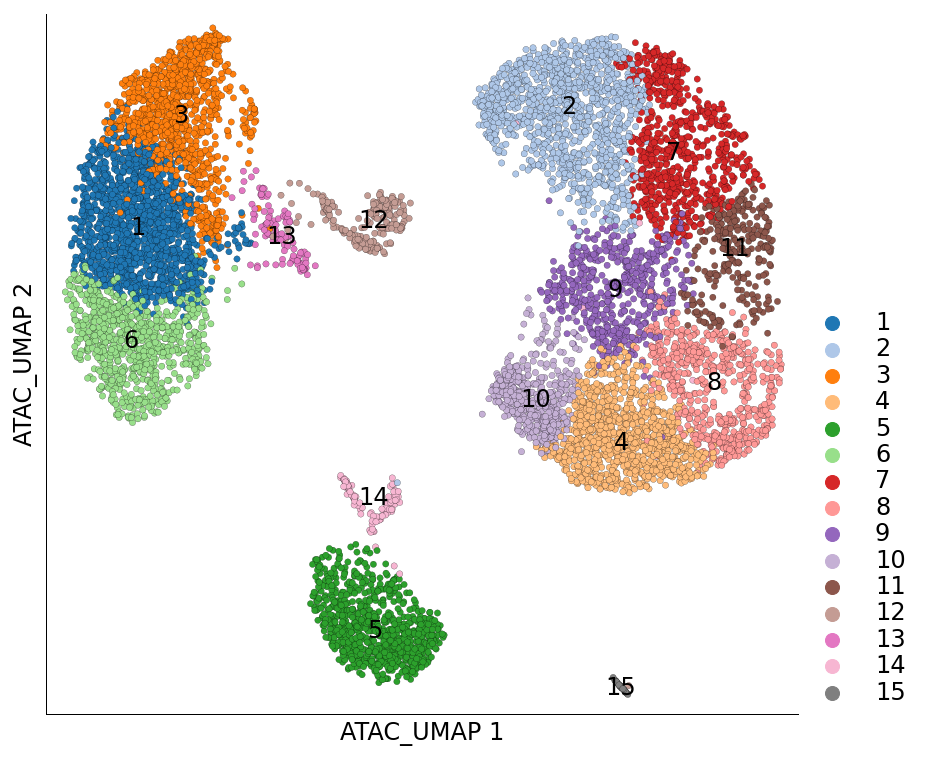

time: 595 ms


In [10]:
ds.plot_layout(layout_key='ATAC_UMAP', color_by='ATAC_leiden_cluster')

---
That is all for this vignette.